# Naive Bayes
This notebook is the first steps we took for analysis. We begin by performing a simple naive bayes after standardizing our continuous variables. We then attempt to correct for the inherent imbalance in our dataset, using both stratification and sampling techniques.

source: https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('data/dbn_for_models.csv')
df.iloc[0]

defects_exist                      0
years_since_last_defects           0
bldgarea                      185785
unitstotal                         8
builtfar                       10.38
median_household_income       135588
over_65_pct                  0.14173
over_white_pct              0.783066
dummy_pressure_type                1
dummy_make                      True
dummy_model                     True
dummy_tract                    False
dummy_owner                     True
defects_history                    0
landuse_1.0                        0
landuse_2.0                        0
landuse_3.0                        0
landuse_4.0                        0
landuse_5.0                        1
landuse_6.0                        0
landuse_7.0                        0
landuse_8.0                        0
landuse_9.0                        0
landuse_10.0                       0
landuse_11.0                       0
Name: 0, dtype: object

In [4]:
# normalize some of the fields
cols = ['bldgarea', 'unitstotal', 'builtfar','median_household_income']

for col in cols:
    df[col] = (df[col]-df[col].mean())/df[col].std()
    
df.describe()

,defects_exist,years_since_last_defects,bldgarea,unitstotal,builtfar,median_household_income,over_65_pct,over_white_pct,dummy_pressure_type,defects_history,...,landuse_2.0,landuse_3.0,landuse_4.0,landuse_5.0,landuse_6.0,landuse_7.0,landuse_8.0,landuse_9.0,landuse_10.0,landuse_11.0
count,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,...,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06,1.535994e+06
mean,1.158045e-01,7.038729e+00,9.233391e-18,5.884205e-18,9.710789e-17,2.077976e-17,1.266336e-01,5.031791e-01,9.965631e-01,1.168581e+00,...,3.511863e-01,1.586966e-01,2.827518e-01,6.232056e-02,1.799226e-02,3.470717e-03,1.035349e-01,1.285161e-03,1.314458e-03,6.145857e-04
std,3.199904e-01,6.136811e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000739e-02,2.831000e-01,5.852395e-02,1.892900e+00,...,4.773412e-01,3.653930e-01,4.503369e-01,2.417369e-01,1.329231e-01,5.881048e-02,3.046564e-01,3.582611e-02,3.623163e-02,2.478323e-02
min,0.000000e+00,0.000000e+00,-3.394371e-01,-2.044870e-01,-1.196623e+00,-1.587783e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,-3.049673e-01,-1.889301e-01,-5.630175e-01,-7.283546e-01,8.644256e-02,2.342017e-01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.000000e+00,-2.682348e-01,-1.630019e-01,-2.063773e-01,-2.493209e-01,1.177924e-01,5.311271e-01,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+01,-4.763509e-02,-5.410344e-02,2.792605e-01,4.537128e-01,1.557648e-01,7.664161e-01,1.000000e+00,2.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,2.700000e+01,9.465637e+01,4.993548e+01,1.694650e+01,4.706371e+00,8.933031e-01,1.000000e+00,1.000000e+00,1.900000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# separate dependent variable (defects_exist)
X, y = df.iloc[:,1:].values, df.iloc[:,0].values

### I. No Method of Imbalance Correction..

In [56]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2015)

#for reproducability
np.random.seed(2015)

# gaussian naive bayes with default parameters
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_test = trained_model.predict_proba(X_test)[:,1]

In [57]:
def evaluation(trained_model, y_pred_test, y_test):
    '''Evaluate model accuracy, precision, and recall'''
    print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))
    print('\n')
    pred_classes = y_pred_test>0.5
    print('Confusion Matrix')
    print(metrics.confusion_matrix(y_test, pred_classes))
    print('\n')
    print(metrics.classification_report(y_test, pred_classes, labels=[0,1]))

def plot_tresholds(y_test, y_test_pred):    
    res = pd.DataFrame()    
    for t in np.linspace(0,0.5,11):
        y_test_pred_class = (y_test_pred > t)        
        data = {
            'Threshold':t,
            'Recall': metrics.recall_score(y_test, y_test_pred_class)*100,
            'Precision': metrics.precision_score(y_test, y_test_pred_class)*100,
            'F1 score': metrics.f1_score(y_test, y_test_pred_class)*100,
            'Accuracy (OS)': metrics.accuracy_score(y_test, y_test_pred_class)*100
        }        
        res = res.append(data, ignore_index=True)        
    res.set_index('Threshold', inplace=True)        
    res.plot()          
    return res

evaluation(trained_model, y_pred_test, y_test)

Out of sample prediction accuracy: 0.7961256384298125


Confusion Matrix
[[228978  42822]
 [ 19808  15591]]


              precision    recall  f1-score   support

           0       0.92      0.84      0.88    271800
           1       0.27      0.44      0.33     35399

   micro avg       0.80      0.80      0.80    307199
   macro avg       0.59      0.64      0.61    307199
weighted avg       0.85      0.80      0.82    307199



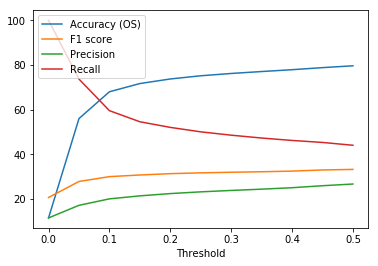

In [58]:
first = plot_tresholds(y_test, y_pred_test)

### II. Stratify data on train/test split

In [59]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=1002)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1077326  235207  249800 ...  123244  913106 1403406] TEST: [ 549606  636383  463286 ... 1012207 1486320 1396327]
TRAIN: [1519425  807549 1204880 ...  352581  816252   39087] TEST: [1151644  256630 1274336 ...  363435  345794  949393]


In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1075195, 24), (1075195,), (460799, 24), (460799,))

In [45]:
# Stratified enables equally dispersed dataset
len(y_train[y_train > 0]) / len(y_train), len(y_test[y_test > 0]) / len(y_test)

(0.11580410995214821, 0.11580537284152093)

In [60]:
np.random.seed(2015)
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_test = trained_model.predict_proba(X_test)[:,1]

evaluation(trained_model, y_pred_test, y_test)

Out of sample prediction accuracy: 0.7955030284353916


Confusion Matrix
[[343149  64287]
 [ 29945  23418]]


              precision    recall  f1-score   support

           0       0.92      0.84      0.88    407436
           1       0.27      0.44      0.33     53363

   micro avg       0.80      0.80      0.80    460799
   macro avg       0.59      0.64      0.61    460799
weighted avg       0.84      0.80      0.82    460799



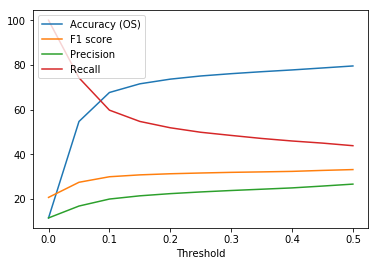

In [61]:
second = plot_tresholds(y_test, y_pred_test)

### III. Resampling to get balanced data
Will try down-sampling the majority class, and up-sampling the minority class, and using more advanced SMOTE technique

#### 1. Under Sampling

In [34]:
from imblearn.under_sampling import RandomUnderSampler as UnderSampler
from imblearn.over_sampling import RandomOverSampler as OverSampler

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2015)

sampler = UnderSampler(random_state=1992)
X_train_under, y_train_under = sampler.fit_resample(X_train, y_train)
X_train_under.shape, X_train.shape, X_test.shape

((284952, 24), (1228795, 24), (307199, 24))

In [63]:
np.random.seed(2015)
gnb = GaussianNB()
trained_model = gnb.fit(X_train_under, y_train_under)
y_pred_test = trained_model.predict_proba(X_test)[:,1]

evaluation(trained_model, y_pred_test, y_test)

Out of sample prediction accuracy: 0.7063076377201749


Confusion Matrix
[[197123  74677]
 [ 15545  19854]]


              precision    recall  f1-score   support

           0       0.93      0.73      0.81    271800
           1       0.21      0.56      0.31     35399

   micro avg       0.71      0.71      0.71    307199
   macro avg       0.57      0.64      0.56    307199
weighted avg       0.84      0.71      0.76    307199



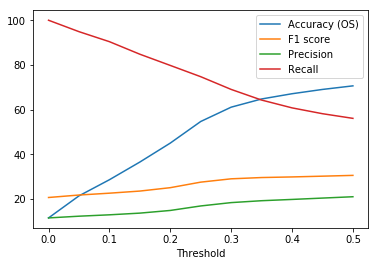

In [64]:
third = plot_tresholds(y_test, y_pred_test)

#### 2. Over Sampling

In [65]:
sampler = OverSampler(random_state=1992)
X_train_over, y_train_over = sampler.fit_resample(X_train, y_train)
X_train_over.shape, X_train.shape, X_test.shape

((2172638, 24), (1228795, 24), (307199, 24))

In [66]:
np.random.seed(2015)
gnb = GaussianNB()
trained_model = gnb.fit(X_train_over,y_train_over)
y_pred_test = trained_model.predict_proba(X_test)[:,1]

evaluation(trained_model, y_pred_test, y_test)

Out of sample prediction accuracy: 0.6896246407052107


Confusion Matrix
[[191248  80552]
 [ 14795  20604]]


              precision    recall  f1-score   support

           0       0.93      0.70      0.80    271800
           1       0.20      0.58      0.30     35399

   micro avg       0.69      0.69      0.69    307199
   macro avg       0.57      0.64      0.55    307199
weighted avg       0.84      0.69      0.74    307199



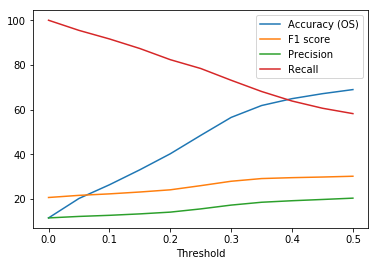

In [67]:
fourth = plot_tresholds(y_test, y_pred_test)

#### 3. SMOTE - synthetic minority over-sampling technique

In [18]:
from imblearn.over_sampling import SMOTE

In [68]:
sampler = SMOTE(random_state=1992)
X_train_smote, y_train_smote = sampler.fit_resample(X_train, y_train)
X_train_smote.shape, X_train.shape, y_train.shape

((2172638, 24), (1228795, 24), (1228795,))

In [69]:
np.random.seed(2015)
gnb = GaussianNB()
trained_model = gnb.fit(X_train_smote,y_train_smote)
y_pred_test = trained_model.predict_proba(X_test)[:,1]

evaluation(trained_model, y_pred_test, y_test)

Out of sample prediction accuracy: 0.5541098766597548


Confusion Matrix
[[144481 127319]
 [  9658  25741]]


              precision    recall  f1-score   support

           0       0.94      0.53      0.68    271800
           1       0.17      0.73      0.27     35399

   micro avg       0.55      0.55      0.55    307199
   macro avg       0.55      0.63      0.48    307199
weighted avg       0.85      0.55      0.63    307199



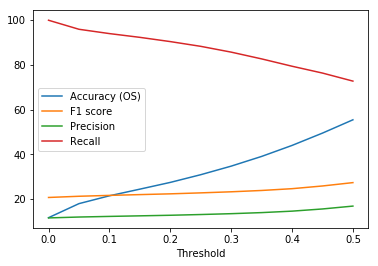

In [70]:
fifth = plot_tresholds(y_test, y_pred_test)